In [25]:
%cd "C:\Users\CARNOT\customer segmentation\customer_segmentation"

C:\Users\CARNOT\customer segmentation\customer_segmentation


In [9]:
import pandas as pd
import yaml
import numpy as np
from src.features.build_features import featurization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import KernelPCA
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark")
%matplotlib inline

import pickle as pk

In [3]:
featurization("params.yaml")

In [42]:
with open("params.yaml") as file:
    config = yaml.safe_load(file)

In [12]:
config

{'random_state': 234,
 'data_loader': {'raw_data': 'data/raw/CC GENERAL.csv',
  'processed_data': 'data/processed/processed_data.csv'},
 'metadata': 'docs/metadata.json',
 'train': {'n_cluster_range': 17, 'n_cluster': 5, 'model': 'models/model.pk'},
 'report': {'metrics': {'hyper_metrics': 'reports/metrics/hyperpam_metrics.json',
   'feature_importance': 'reports/metrics/feature_importance.json'},
  'visual': {'no_clustersvsinertia': 'reports/figures/no_Clusters_vs_Inertia.jpg',
   'no_clustersvssilhouette': 'reports/figures/no_Clusters_vs_silhouette.jpg',
   'feature_importance': 'reports/figures/feature_importance.jpg'}}}

In [6]:
df = pd.read_csv(config["data_loader"]["processed_data"])

In [7]:
X = df.copy().values

In [8]:
model = KMeans(n_clusters=config["train"]["n_cluster"], random_state=config["random_state"])
model.fit(X)

KMeans(n_clusters=5, random_state=234)

In [13]:
with open(config["train"]["model"], "wb") as  file:
    pk.dump(model, file)

In [14]:
mean_cluster_center = pd.Series(model.cluster_centers_.mean(0), index=df.columns).sort_values(ascending=False)

In [15]:
with open(config["report"]["metrics"]["feature_importance"], "w") as file:
    json.dump(mean_cluster_center.to_dict(), file)


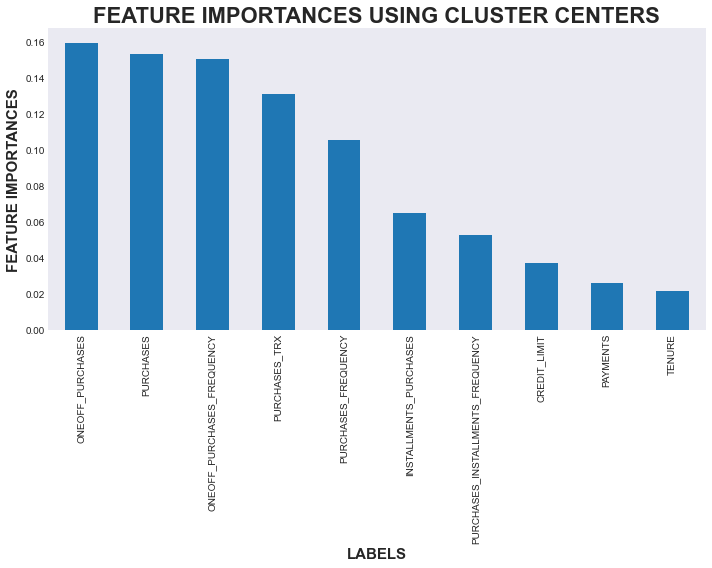

In [17]:
plt.figure(figsize=(10,8))
mean_cluster_center[:config["train"]["n_impt_feat"]].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("LABELS", size=15, weight="bold")
plt.ylabel("FEATURE IMPORTANCES", size=15, weight="bold")
plt.title("FEATURE IMPORTANCES USING CLUSTER CENTERS", size=22, weight="bold")
plt.tight_layout()
plt.savefig(config["report"]["visual"]["feature_importance"]);

In [28]:
with open(config["data_loader"]["X_kpca"], "rb") as file:
    X_kpca = pk.load(file)

In [29]:
model_vis = KMeans(n_clusters=config["train"]["n_cluster"], random_state=config["random_state"])
model_vis.fit(X_kpca)

KMeans(n_clusters=5, random_state=234)

In [33]:
model_vis.cluster_centers_

array([[ 0.52831213, -0.02677606],
       [-0.29312655, -0.34663089],
       [ 0.00299491,  0.3539708 ],
       [-0.36135172,  0.20870924],
       [-0.01014048, -0.11337777]])

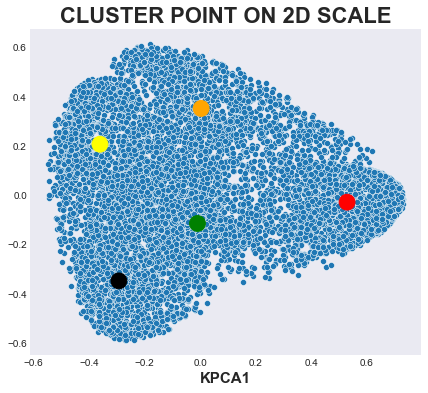

In [44]:
color=["red", "black", "orange", "yellow", "green"]
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1])
plt.scatter(x=model_vis.cluster_centers_[:, 0], y=model_vis.cluster_centers_[:, 1], s=250, c=color)
plt.title("CLUSTER POINT ON 2D SCALE", size=22, weight="bold")
plt.xlabel("KPCA1", size=15, weight="bold")
plt.xlabel("KPCA1", size=15, weight="bold")
plt.savefig(config["report"]["visual"]["cluster_center"]);